# Gasification Gas yield model run

### Import the relevant libraries

In [1]:
import numpy as np
import tensorflow as tf
import statsmodels.api as sm

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data

In [2]:
npz = np.load('Gasif1.npz')

train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.float)

npz = np.load('Gasif2.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

npz = np.load('Gasif3.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

### Model
Outline, optimizers, loss, early stopping and training

In [116]:
# Set the input and output sizes
input_size = 3
output_size = 1
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
   
    tf.keras.layers.Dense(hidden_layer_size,'relu'),
    tf.keras.layers.Dense(hidden_layer_size,'relu'),

    tf.keras.layers.Dense(output_size,'linear') # output layer
])


# Choose the optimizer and the loss function


optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

model.compile(optimizer, loss='MAE')

# Training

# set the batch size
batch_size = 5

# set a maximum number of training epochs
max_epochs = 900

# set an early stopping mechanism
early_stopping = tf.keras.callbacks.EarlyStopping(patience=100)


model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 70 samples, validate on 15 samples
Epoch 1/900
70/70 - 1s - loss: 0.2409 - val_loss: 0.1635
Epoch 2/900
70/70 - 0s - loss: 0.2191 - val_loss: 0.2307
Epoch 3/900
70/70 - 0s - loss: 0.1950 - val_loss: 0.2087
Epoch 4/900
70/70 - 0s - loss: 0.1969 - val_loss: 0.1558
Epoch 5/900
70/70 - 0s - loss: 0.2079 - val_loss: 0.1888
Epoch 6/900
70/70 - 0s - loss: 0.1733 - val_loss: 0.1867
Epoch 7/900
70/70 - 0s - loss: 0.1844 - val_loss: 0.2384
Epoch 8/900
70/70 - 0s - loss: 0.2099 - val_loss: 0.1634
Epoch 9/900
70/70 - 0s - loss: 0.1593 - val_loss: 0.1962
Epoch 10/900
70/70 - 0s - loss: 0.1495 - val_loss: 0.1591
Epoch 11/900
70/70 - 0s - loss: 0.1476 - val_loss: 0.1774
Epoch 12/900
70/70 - 0s - loss: 0.1875 - val_loss: 0.1473
Epoch 13/900
70/70 - 0s - loss: 0.1602 - val_loss: 0.1760
Epoch 14/900
70/70 - 0s - loss: 0.1463 - val_loss: 0.1549
Epoch 15/900
70/70 - 0s - loss: 0.1450 - val_loss: 0.1511
Epoch 16/900
70/70 - 0s - loss: 0.1431 - val_loss: 0.1856
Epoch 17/900
70/70 - 0s - loss: 0.146

Epoch 141/900
70/70 - 0s - loss: 0.1492 - val_loss: 0.0971
Epoch 142/900
70/70 - 0s - loss: 0.1244 - val_loss: 0.0878
Epoch 143/900
70/70 - 0s - loss: 0.0984 - val_loss: 0.0915
Epoch 144/900
70/70 - 0s - loss: 0.1000 - val_loss: 0.1189
Epoch 145/900
70/70 - 0s - loss: 0.0858 - val_loss: 0.0800
Epoch 146/900
70/70 - 0s - loss: 0.0865 - val_loss: 0.0958
Epoch 147/900
70/70 - 0s - loss: 0.0867 - val_loss: 0.0727
Epoch 148/900
70/70 - 0s - loss: 0.1018 - val_loss: 0.1007
Epoch 149/900
70/70 - 0s - loss: 0.1236 - val_loss: 0.0839
Epoch 150/900
70/70 - 0s - loss: 0.0947 - val_loss: 0.0979
Epoch 151/900
70/70 - 0s - loss: 0.0968 - val_loss: 0.0916
Epoch 152/900
70/70 - 0s - loss: 0.0971 - val_loss: 0.0834
Epoch 153/900
70/70 - 0s - loss: 0.1229 - val_loss: 0.0836
Epoch 154/900
70/70 - 0s - loss: 0.1007 - val_loss: 0.0990
Epoch 155/900
70/70 - 0s - loss: 0.1104 - val_loss: 0.0800
Epoch 156/900
70/70 - 0s - loss: 0.1105 - val_loss: 0.1304
Epoch 157/900
70/70 - 0s - loss: 0.0985 - val_loss: 0.12

Epoch 280/900
70/70 - 0s - loss: 0.1230 - val_loss: 0.1334
Epoch 281/900
70/70 - 0s - loss: 0.1081 - val_loss: 0.0953
Epoch 282/900
70/70 - 0s - loss: 0.0849 - val_loss: 0.0877
Epoch 283/900
70/70 - 0s - loss: 0.0726 - val_loss: 0.1012
Epoch 284/900
70/70 - 0s - loss: 0.0808 - val_loss: 0.1058
Epoch 285/900
70/70 - 0s - loss: 0.0717 - val_loss: 0.0822
Epoch 286/900
70/70 - 0s - loss: 0.0757 - val_loss: 0.0835
Epoch 287/900
70/70 - 0s - loss: 0.0817 - val_loss: 0.1023
Epoch 288/900
70/70 - 0s - loss: 0.0751 - val_loss: 0.0744
Epoch 289/900
70/70 - 0s - loss: 0.0895 - val_loss: 0.1080
Epoch 290/900
70/70 - 0s - loss: 0.0769 - val_loss: 0.1150
Epoch 291/900
70/70 - 0s - loss: 0.0708 - val_loss: 0.0836


In [123]:
model.evaluate(test_inputs,test_targets)

17/17 [==============================] - 0s 4ms/sample - loss: 0.0394


0.03940813988447189

# train data evaluation

In [124]:
train_outputs=np.squeeze(model.predict_on_batch(train_inputs)).round(2)
train_outputs

array([0.13, 0.51, 0.19, 0.88, 0.26, 0.42, 0.18, 0.55, 0.13, 0.3 , 0.3 ,
       0.51, 0.13, 0.07, 0.13, 0.14, 0.43, 0.24, 0.18, 0.15, 0.46, 0.23,
       0.16, 0.14, 0.39, 0.17, 0.87, 0.45, 0.13, 0.13, 0.31, 0.37, 0.52,
       0.37, 0.24, 0.15, 0.43, 0.85, 0.4 , 0.32, 0.13, 0.09, 0.31, 0.53,
       0.13, 0.31, 0.35, 0.32, 0.3 , 0.3 , 0.19, 0.11, 0.45, 0.08, 0.21,
       0.5 , 0.22, 0.28, 0.43, 0.48, 0.31, 0.13, 0.51, 0.15, 0.25, 0.52,
       0.53, 0.27, 0.86, 0.11, 0.44, 0.15, 0.18, 0.13, 0.49, 0.11, 0.23],
      dtype=float32)

In [125]:
train_targets.round(2)

array([[0.08],
       [0.56],
       [0.18],
       [0.97],
       [0.29],
       [0.51],
       [0.05],
       [0.59],
       [0.12],
       [0.32],
       [0.29],
       [0.56],
       [0.1 ],
       [0.06],
       [0.11],
       [0.15],
       [0.76],
       [0.23],
       [0.13],
       [0.1 ],
       [0.46],
       [0.29],
       [0.16],
       [0.14],
       [0.4 ],
       [0.17],
       [0.97],
       [0.47],
       [0.06],
       [0.09],
       [0.3 ],
       [0.45],
       [0.53],
       [0.27],
       [0.26],
       [0.13],
       [0.43],
       [0.97],
       [0.39],
       [0.37],
       [0.09],
       [0.07],
       [0.31],
       [0.56],
       [0.17],
       [0.37],
       [0.36],
       [0.37],
       [0.33],
       [0.35],
       [0.21],
       [0.08],
       [0.43],
       [0.09],
       [0.2 ],
       [0.56],
       [0.23],
       [0.18],
       [0.51],
       [0.62],
       [0.31],
       [0.1 ],
       [0.56],
       [0.17],
       [0.36],
       [0.56],
       [0.

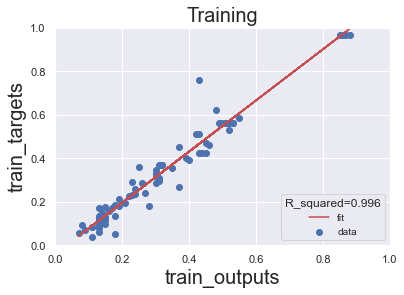

In [126]:
import matplotlib.pyplot as plt
plt.scatter(train_outputs,train_targets,label='data')
x= train_outputs
y=train_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'r',label='fit')
plt.legend(loc='lower right',title='R_squared=0.996',fontsize=10)
plt.title('Training',fontsize=20)
plt.xlabel('train_outputs',fontsize=20)
plt.ylabel('train_targets',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [127]:
b = train_targets
a1 = train_outputs
a = sm.add_constant(a1)
results = sm.OLS(b,a).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1377.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.21e-50
Time:                        18:03:24   Log-Likelihood:                 118.07
No. Observations:                  77   AIC:                            -232.1
Df Residuals:                      75   BIC:                            -227.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0398      0.012     -3.439      0.001      -0.063      -0.017
x1             1.1767      0.032     37.106      0.000       1.113       1.240
==============================================================================
Omnibus:                       59.100   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.921
Skew:                           2.052   Prob(JB):                    1.02e-109
Kurtosis:                      14.815   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Test data evaluation

In [128]:
test_outputs=np.squeeze(model.predict_on_batch(test_inputs)).round(2)
test_outputs

array([1.01, 0.3 , 0.38, 0.14, 0.42, 0.21, 0.4 , 0.41, 0.55, 0.16, 0.49,
       0.22, 0.52, 0.12, 0.5 , 0.2 , 0.27], dtype=float32)

In [129]:
test_targets.round(2)

array([[1.  ],
       [0.37],
       [0.42],
       [0.14],
       [0.48],
       [0.21],
       [0.22],
       [0.51],
       [0.56],
       [0.16],
       [0.56],
       [0.21],
       [0.56],
       [0.11],
       [0.5 ],
       [0.22],
       [0.23]])

## Average error

In [130]:
p=[]
for i in range(len(test_targets)):
    a=abs(test_targets[i]-test_outputs[i])*9.706/3.64
    p.append(a)
print(max(p),min(p))

[0.46769232] [0.00803844]


In [131]:
a=model.evaluate(test_inputs,test_targets)*9.706
b=a
f'mean absolute error = {b}Nm^3/kg',f'error percentage = {(b/3.64)*100}%'

17/17 [==============================] - 0s 2ms/sample - loss: 0.0394


('mean absolute error = 0.3824954057186842Nm^3/kg',
 'error percentage = 10.508115541722091%')

In [132]:
p=[]
for i in range(len(train_targets)):
    a=abs(train_targets[i]-train_outputs[i])*9.706/3.64
    p.append(a)
print(max(p),min(p))

[0.88143405] [0.00081318]


In [133]:
a=model.evaluate(train_inputs,train_targets)*9.706
b=a
f'mean absolute error = {b}Nm^3/kg',f'error percentage = {(b/2.3)*100}%'

77/77 [==============================] - 0s 4ms/sample - loss: 0.0425


('mean absolute error = 0.4128229969383834Nm^3/kg',
 'error percentage = 17.94882595384276%')

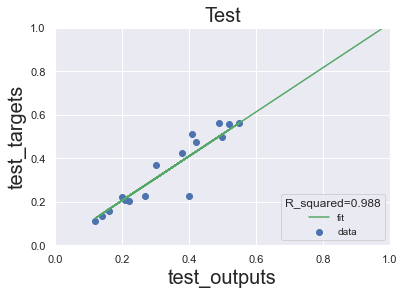

In [134]:
import matplotlib.pyplot as plt
plt.scatter(test_outputs,test_targets,label='data')
x= test_outputs
y=test_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'g',label='fit')
plt.legend(loc='lower right',title='R_squared=0.988',fontsize=10)
plt.title('Test',fontsize=20)
plt.xlabel('test_outputs',fontsize=20)
plt.ylabel('test_targets',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [135]:
y = test_targets
x1 = test_outputs
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     198.7
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           4.66e-10
Time:                        18:03:43   Log-Likelihood:                 24.037
No. Observations:                  17   AIC:                            -44.07
Df Residuals:                      15   BIC:                            -42.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.031      0.075      0.941      -0.063       0.068
x1             1.0180      0.072     14.095      0.000       0.864       1.172
==============================================================================
Omnibus:                       14.930   Durbin-Watson:                   2.604
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.810
Skew:                          -1.479   Prob(JB):                      0.00100
Kurtosis:                       6.277   Cond. No.                         5.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Saving the model

In [125]:
model.save('Gasification_LHV_model_total.h5') 

### Retrieving the model

In [3]:
model = tf.keras.models.load_model('Gasification_LHV_model.h5')

In [4]:
import joblib
trans1=joblib.load('f1')
trans2=joblib.load('f2')

### Model deployment

In [8]:
C=float(input('enter your carbon percentage%:>>>'))
H=float(input('enter your hydrogen  percentage%:>>>'))
O=float(input('enter your oxygen  percentage%:>>>'))
A=float(input('enter your ash  percentage%:>>>'))
T=float(input('enter your temperature in c :>>>'))
ER=float(input('enter your equivalence ratio :>>>'))


a=np.array([[C,H,O,A,T,ER],
           ])

x= trans1.transform(a)

y=model.predict_on_batch(x)
real_y= trans2.inverse_transform(y)

print(y,f'your LHV MJ/Nm3 equals{real_y}')

enter your carbon percentage%:>>>44
enter your hydrogen  percentage%:>>>34
enter your oxygen  percentage%:>>>12
enter your ash  percentage%:>>>44
enter your temperature in c :>>>700
enter your equivalence ratio :>>>0.6
[[1.3375412]] your LHV MJ/Nm3 equals[[13.350175]]


## Optimization of neural network using genetic algorithms

In [9]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing
from scipy.optimize import NonlinearConstraint
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

### Dual annealing optimizer

In [16]:
def objective(x, sign=-1.0):  
    
    z=np.array([x,])
    y=model.predict_on_batch(z)
    return float(np.squeeze(sign*y))



b1 = (0.,1.)
b2 = (0.,1.)
b3 = (0.,1.)
b4 = (0.,1.)
b5 = (0.,1.)
b6=  (0.,1.)


bnds= (b1,b2,b3,b4,b5,b6)
# x0=[0.9999,0.1221,0.000047,0.66769,0.7336]


sol = dual_annealing(objective,bounds=bnds,maxiter=800)

print(sol)

     fun: -3.0962164402008057
 message: ['Maximum number of iteration reached']
    nfev: 10336
    nhev: 0
     nit: 800
    njev: 105
  status: 0
 success: True
       x: array([0.00046484, 0.000344  , 0.99983531, 0.18023312, 0.511318  ,
       0.24387005])


In [9]:
print(trans1.inverse_transform(np.array([sol.x]).reshape(1,-1)))
f'the maximum gas yield equals {trans2.inverse_transform(np.array([-sol.fun]).reshape(-1,1))} Nm^3/kg'

[[ 11.15001382   1.47000124  48.47         7.72746274 656.74570069
    0.5996453 ]]


'the maximum gas yield equals [[30.52819936]] Nm^3/kg'

### Differential evolution optimizer

In [18]:
def objective(x, sign=-1.0):  
    
    z=np.array([x,])
    y=model.predict_on_batch(z)
    return float(np.squeeze(sign*y))


def constraint1(x):
    
    z=np.array([x,])
    b= list(np.squeeze(trans1.inverse_transform(z)))
    C=b[0]
    H=b[1]
    O=b[2]
    
    return (C+H+O)
cons= NonlinearConstraint(constraint1, 12., 100.)



b1 = (0.,1.)
b2 = (0.,1.)
b3 = (0.,1.)
b4 = (0.,1.)
b5 = (0.,1.)
b6=  (0.,1.)


bnds= (b1,b2,b3,b4,b5,b6)
sol1 = differential_evolution(objective,bounds=bnds,constraints=cons,maxiter=1000)

print(sol1)

           constr: [array([0.])]
 constr_violation: 0.0
              fun: -3.3472135066986084
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 5737
              nit: 71
          success: True
                x: array([0.00271499, 0.00049771, 0.99912187, 0.00101484, 0.10293454,
       0.37480962])


In [19]:
print(trans1.inverse_transform(np.array([sol1.x]).reshape(1,-1)))
f'the maximum gas yield equals {trans2.inverse_transform(np.array([-sol1.fun]).reshape(-1,1))} Mj/Nm3'

[[ 11.35275573   1.47642547  48.42743684   0.19506892 451.46726774
    0.31866433]]


'the maximum gas yield equals [[32.8560543]] Mj/Nm3'

### Significance test

In [20]:
list1= ['C','H','O','A','T','ER']
w=[]
b={}
inp=train_inputs
inp = tf.Variable(inp, dtype=tf.float32)

with tf.GradientTape() as tape:
    preds = model(inp)
grads = np.squeeze(tape.gradient(preds, inp))

for i in range(train_inputs.shape[1]):
    a=sum((grads[:,i])**2)/(train_inputs.shape[0])
    w.append(a.round(5))
for i in range(train_inputs.shape[1]):
    b[list1[i]]=w[i]
print(b)

{'C': 0.56548, 'H': 4.14634, 'O': 4.90264, 'A': 2.22959, 'T': 0.24152, 'ER': 0.02301}


In [21]:
t=[]
for i in w:
    t.append((i/sum(w)).round(3))
print(t)

[0.047, 0.342, 0.405, 0.184, 0.02, 0.002]


[Text(0.5, 0, 'variables'), Text(0, 0.5, 'sensitivity')]

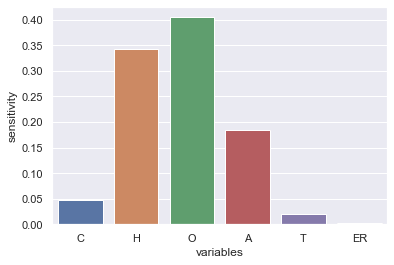

In [22]:
import seaborn as sns
sns.set()
sns.barplot(x=list1,y=t).set(xlabel='variables',ylabel='sensitivity')